<h2> Exploratory Data Analysis on Haberman Cancer Survival dataset</h2>
<h3> by Shekhar Pandey </h3>

<h3> Description of Dataset </h3>
<p> Haberman’s dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.</p>
Source: <a href='https://www.kaggle.com/gilsousa/habermans-survival-data-set'>habermans-dataset</a></p>
<br><br><h3><u>About Data</u></h3>

* Dataset contains 306 datapoints
* Dataset has 4 attributes (3 features and 1 class variable)
<br>
<h3> Attribute Information</h3>
* Age (numeric): Age of patient at time of operation 
* Operation Year (numeric): Year when patient had undergone operation (year-1900)
* Number of positive axillary nodes detected (numeric)
* Survival status (class attribute) 
  1 = the patient survived 5 years or longer 
  2 = the patient died within 5 year
<br><br>
<h3> Objective </h3>
<p>Objective is to classify survival status of a patient based on  given features</p>

<h3>Import relevant libraries to perform EDA </h3>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3>Load dataset</h3>

In [92]:
df = pd.read_csv('haberman.csv')

### Glance at dataset

In [93]:
df.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Transforming Survival_Status column
* Since Survival status 1 indicates patients who survived 5 years period and status 2 indicates patients who did not survive.
* Lets transform these values 1 and 2 as Yes and No respectively, indicating patient survived as 'Yes' and not survived as 'No'.

In [95]:
# mapping survival status 1 as Yes, and 2 as No
df['status'] = df['status'].map({1:'Yes', 2:'No'})

# making class attribute as categorical
df['status'] = df['status'].astype('category')

In [96]:
### Transforming Year column as years are of 1900 , we just neeed to add 1900 to represent  year
df['year'] = df['year'] + 1900

In [97]:
# quick glance at dataset
df.head(5)

,age,year,nodes,status
0,30,1964,1,Yes
1,30,1962,3,Yes
2,30,1965,0,Yes
3,31,1959,2,Yes
4,31,1965,4,Yes


In [98]:
# check datatypes of attributes
df.dtypes

age          int64
year         int64
nodes        int64
status    category
dtype: object

* Age , Year, Nodes are integers
* Status is categorical

### Datapoints

In [99]:
df.shape

(306, 4)

* Dataset has 304 datapoints, 3 features and 1 class attribute

### Datapoints per class

In [100]:
df['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64

In [101]:
# percentage classification
np.round(df['status'].value_counts() / df.shape[0] * 100, 2) 

Yes    73.53
No     26.47
Name: status, dtype: float64

* This is an imbalanced classification as 73% datapoints belong to one class (who survived) while 27% to other class (who did not survive)

<h3>Completeness of dataset</h3>

In [102]:
# Check for any missing data in dataset
df.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

* 0 indicates none of the columns have any missing data , which is good

### Univariate Analysis

### Age 

In [103]:
df['age'].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age, dtype: float64

* Average Age of patients is 52 years
* Minimum age recorded as 30 yrs while Maximum age as 83

In [104]:
# create 2 datasets based on Survival_Status

survived_df = df[df.status == 'Yes']
notsurvived_df = df[df.status == 'No']

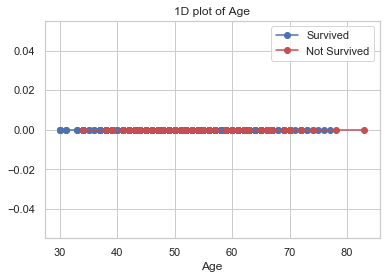

In [106]:
# Age 

plt.plot(survived_df['age'], np.zeros_like(survived_df['age']), marker='o', c='b', label='Survived')
plt.plot(notsurvived_df['age'], np.zeros_like(notsurvived_df['age']), marker='o', c='r', label='Not Survived')
plt.xlabel('Age')
plt.title('1D plot of Age')
plt.legend()
plt.show()

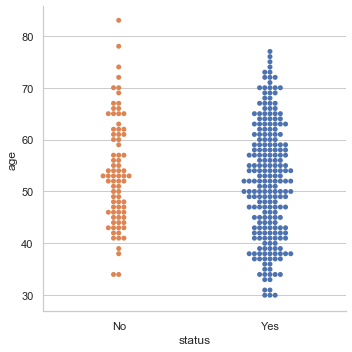

In [107]:
# lets plot datapoints both classes for Age side by side
ax = sns.catplot(x='status', y='age', kind='swarm', hue='status', hue_order=['Yes','No'], data=df)

* There is an overlap across all age groups between survived and not-survived patients
* At very inital age group 30-35 , it has survived patients more compared to not-survived

### Histogram of Age

Text(0.5, 1.0, 'Histogram of Age')

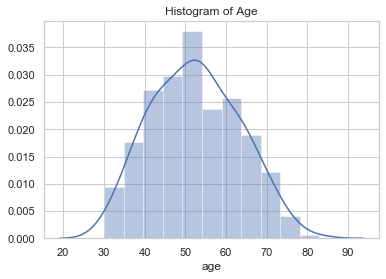

In [108]:
ax = sns.distplot(df['age'])
ax.set_title('Histogram of Age')

* Majority of patients (around 75%) were in 40-65 age group range

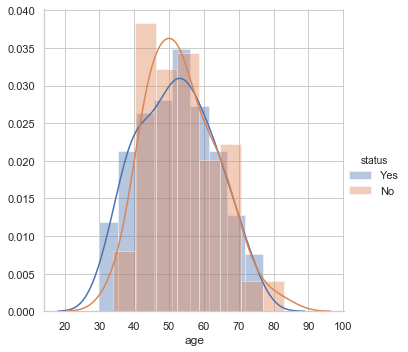

In [109]:
# Histogram of age by Survival Status
g = sns.FacetGrid(data=df, hue='status', height=5, hue_order=['Yes','No'])
g = g.map(sns.distplot, 'age')
g = g.add_legend()

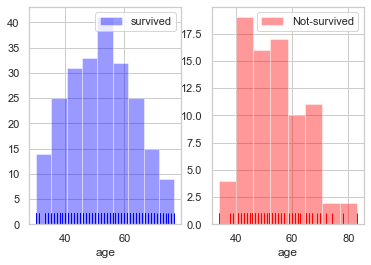

In [110]:
# Histogram of age for survived and not-survived patients
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.distplot(survived_df['age'], kde=False, rug=True, color='blue', label='survived', ax=axs[0])
sns.distplot(notsurvived_df['age'], kde=False, rug=True, color='red', label='Not-survived', ax=axs[1])

axs[0].legend()
axs[1].legend()
plt.show()

* There is a lot of overlap in Age group between patients who survived or not
* In age group of 30-40, we notice that survival status 'Yes' has high probability

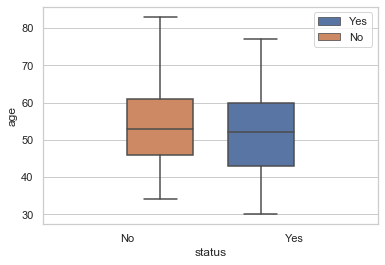

In [111]:
# boxplot 
ax = sns.boxplot(data=df, x='status', y='age', hue='status', hue_order=['Yes','No'])
ax.legend(loc='best')
plt.show()

* Median age of patients who survived and who don''t is almost same
* If we compare 25''th percentile and whiskers, we notice patients whose age was less had survived better compared to more aged patients
* if age is between 30-35 patient has survived

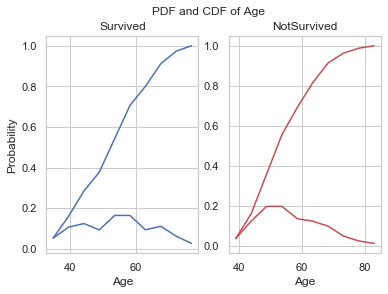

In [113]:
# lets divide dataset into survived and notsurvived datasets

hist, bin_edges = np.histogram(survived_df['age'], bins=10, density=True)
pdf = hist/sum(hist)
cdf = np.cumsum(pdf)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(6,4))
ax1.plot(bin_edges[1:], pdf, color='b', label='pdf')
ax1.plot(bin_edges[1:], cdf, color='b', label='cdf')


hist, bin_edges = np.histogram(notsurvived_df['age'], bins=10, density=True)
pdf = hist/sum(hist)
cdf = np.cumsum(pdf)


ax2.plot(bin_edges[1:], pdf, color='r', label='pdf')
ax2.plot(bin_edges[1:], cdf, color='r', label='cdf')

plt.suptitle('PDF and CDF of Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Probability')
ax1.set_title('Survived')
ax2.set_xlabel('Age')
ax2.set_title('NotSurvived')

plt.show()

* Of those patients who survived, 80% were upto age of 62
* Of those patients who did not survive, 80% below age of 62
* So we see there is a huge overlap in age group between 2 classes

### Year when patient was operated

In [114]:
np.min(df['year']), np.max(df['year'])

(1958, 1969)

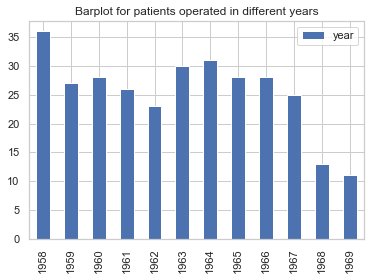

In [115]:
# Yearwise count of patients who got operated
byYear = pd.DataFrame(df['year'].value_counts().sort_index())
byYear.plot(kind='bar')
plt.title('Barplot for patients operated in different years')
plt.show()

* Except for 1968, 1969 , number of patients operated every year were more than 25
* Year 1958 had highest (35) no. of patients operated

### Lets visualise by year of operation basis how many patients survived

In [116]:
byYearStatus = pd.DataFrame(df.groupby(['year','status']).size()).reset_index()
byYearStatus.columns = ['year', 'status', 'Count']
byYearStatus.head(4)

,year,status,Count
0,1958,No,12
1,1958,Yes,24
2,1959,No,9
3,1959,Yes,18


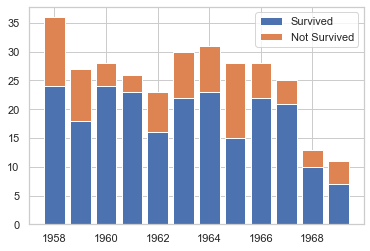

In [117]:
#Stacked Barchart
fig, ax = plt.subplots()

byYearStatus_Surv = byYearStatus[byYearStatus.status=='Yes']
byYearStatus_NotSurv = byYearStatus[byYearStatus.status=='No']

ax.bar(byYearStatus_Surv['year'], byYearStatus_Surv['Count'], label='Survived')
ax.bar(byYearStatus_NotSurv['year'], byYearStatus_NotSurv['Count'], bottom=byYearStatus_Surv['Count'], label='Not Survived')

ax.legend()
plt.show()

* Of the total patients operated across the years, 1965 year has high percentage of Not Survived

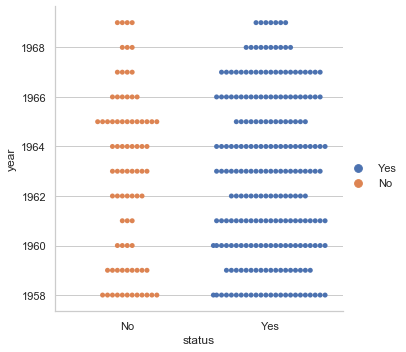

In [118]:
# Swarm plot
ax = sns.catplot(x='status', y='year', kind='swarm', hue='status', hue_order=['Yes','No'], data=df)
ax.add_legend()

plt.show()

* 1961 had high percentage of Survived patients
* 1965 had almost equal percentage of Survived & Not Survived patients
* Year also does not seem to be a good feature to distingush the two classes

### Positive_Axillary_Nodes

<p>A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread.</p>

In [119]:
df['nodes'].describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: nodes, dtype: float64

* average value of positive axillary nodes is 4
* notice upto 75 percentile its value is 4, where as max value is 52, indicating outliers

### Lets plot percentile value of positive axillary nodes 

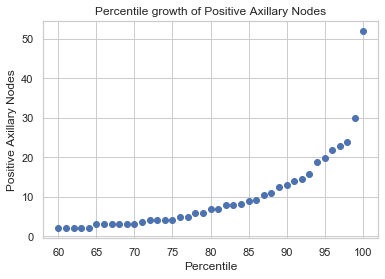

In [120]:
x = np.arange(60, 101, 1)
p = np.percentile(df['nodes'], x)
plt.scatter(x,p)
plt.xlabel('Percentile')
plt.ylabel('Positive Axillary Nodes')
plt.title('Percentile growth of Positive Axillary Nodes')

plt.show()

* 85 percent of patients have Positive axillary nodes upto 10 only 
* It is very rare to have patient more than 30 axillary nodes
* There is an outlier where a patient has 53 Positive axillary nodes

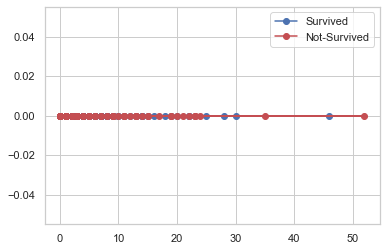

In [121]:
# 1D plot
plt.plot(survived_df['nodes'], np.zeros_like(survived_df['nodes']), marker='o', color='b', label='Survived')
plt.plot(notsurvived_df['nodes'], np.zeros_like(notsurvived_df['nodes']), marker='o', color='r', label='Not-Survived')
plt.legend()

plt.show()


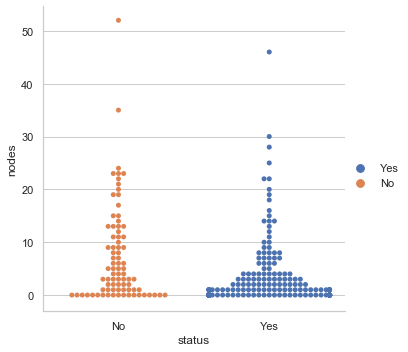

In [122]:
# swarm plot
ax = sns.catplot(x='status', y='nodes', hue='status', 
                 kind='swarm', hue_order=['Yes','No'], data=df)
ax.add_legend()
plt.show()

* majority of patients had upto 10 Positive Axillary Nodes

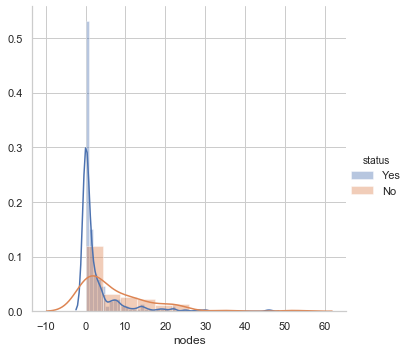

In [123]:
# histogram 
g = sns.FacetGrid(df, hue='status', hue_order=['Yes','No'], height=5)
g = g.map(sns.distplot, 'nodes')
g = g.add_legend()

plt.show()

* We see a spike in Survival status between 0-5 Positive axillary nodes

### PDF, CDF

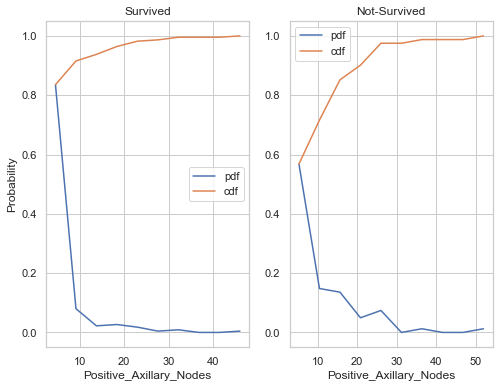

In [124]:
fig, axs = plt.subplots(1,2, figsize=(8,6))

hist, bin_edges = np.histogram(survived_df['nodes'], bins=10,density=True)
pdf = hist/sum(hist)
cdf = np.cumsum(pdf)

axs[0].plot(bin_edges[1:], pdf, label='pdf')
axs[0].plot(bin_edges[1:], cdf, label='cdf')
axs[0].set_xlabel('Positive_Axillary_Nodes')
axs[0].set_ylabel('Probability')
axs[0].set_title('Survived')

hist, bin_edges = np.histogram(notsurvived_df['nodes'], bins=10,density=True)
pdf = hist/sum(hist)
cdf = np.cumsum(pdf)

axs[1].plot(bin_edges[1:], pdf, label='pdf')
axs[1].plot(bin_edges[1:], cdf, label='cdf')
axs[1].set_xlabel('Positive_Axillary_Nodes')
axs[1].set_title('Not-Survived')

axs[0].legend()
axs[1].legend()

plt.show()

* Patients with less no. of nodes like 0 or 1  have high  chances of survival

### Boxplot

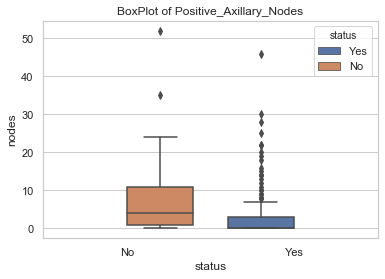

In [125]:
ax = sns.boxplot(x='status', y='nodes', hue='status', hue_order=['Yes','No'], data=df)

ax.set_title('BoxPlot of Positive_Axillary_Nodes')
plt.show()

* Though we see patients who had more than 10 nodes also survived , 
  however majority of patients who survived had very less no. of nodes i.e <=5

In [126]:
byNodesStatus = pd.DataFrame(df.groupby(['nodes','status']).size())
byNodesStatus.reset_index(inplace=True)

In [127]:
byNodesStatus.columns = ['nodes', 'status', 'Count']
byNodesStatus.head(4)

,nodes,status,Count
0,0,No,19
1,0,Yes,117
2,1,No,8
3,1,Yes,33


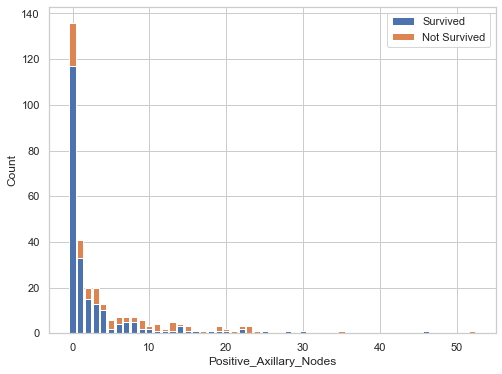

In [128]:
#Stacked barchart
fig, ax = plt.subplots(figsize=(8,6))

byNodesStatus_Surv = byNodesStatus[byNodesStatus.status=='Yes']
byNodesStatus_NotSurv = byNodesStatus[byNodesStatus.status=='No']

ax.bar(byNodesStatus_Surv['nodes'], byNodesStatus_Surv['Count'], label='Survived')
ax.bar(byNodesStatus_NotSurv['nodes'], byNodesStatus_NotSurv['Count'], bottom=byNodesStatus_Surv['Count'], label='Not Survived')

ax.set_xlabel('Positive_Axillary_Nodes')
ax.set_ylabel('Count')
ax.legend()
plt.show()

* Patients with 0 positive axillary nodes have high rate of survival, followed by patients with 1 node

### Bivariate Analysis

### pairplot

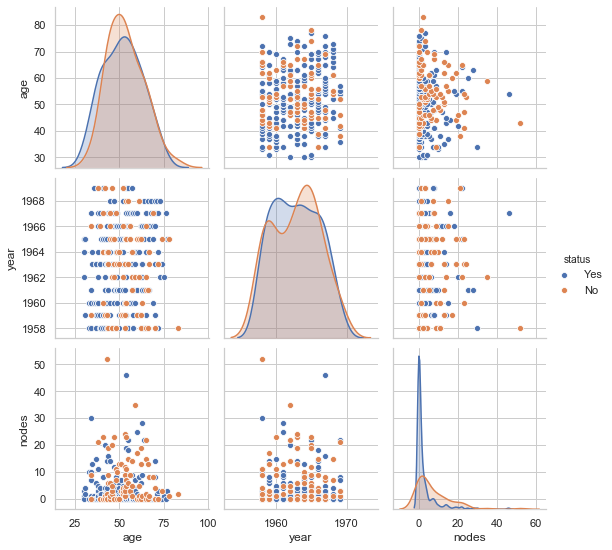

In [129]:
sns.set_style('whitegrid')

sns.pairplot(df, hue='status', vars = ['age', 'year', 'nodes'], hue_order=['Yes','No'],
             # diag_kind='none', corner=True
            )
plt.show()

* Year and Age - In Age group of upto mid 30s (i.e 30-35) , patients have mostly survived in all the Years they were operated
* Positive_Axillary_Nodes and Age : For Node 0 -3 and age under 30-35 , patients have high survival rate

### Positive_Axillary_Nodes and Age 

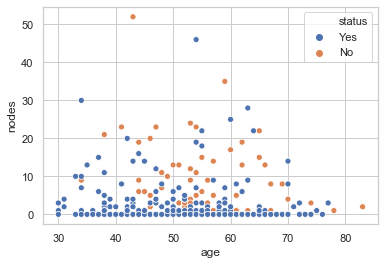

In [130]:
ax = sns.scatterplot(x='age', y='nodes', hue='status', hue_order=['Yes', 'No'], data=df)


## Lets Zoom in where no. of Axillary node is < =10

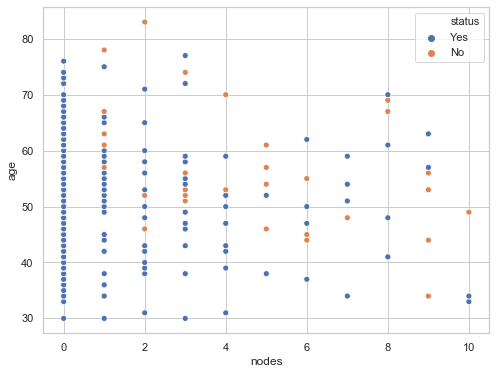

In [131]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.scatterplot(x='nodes', y='age', hue='status', hue_order=['Yes', 'No'], 
                     data=df.query('nodes <= 10'))

* All age group patients with 0 axillary node survived
* All patients with 1 axillary node and under age group 55 survived

## Contour plot

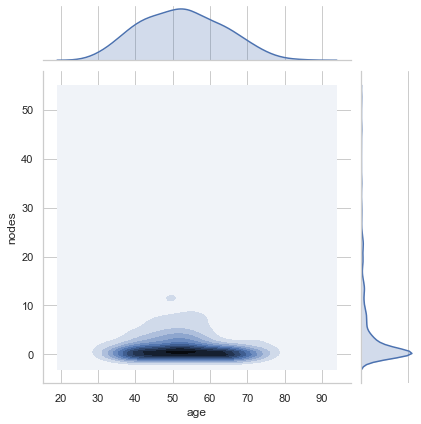

In [132]:
sns.jointplot(x="age",y="nodes",data=df ,kind="kde")
plt.grid()
plt.show()

* We observed the density of data points in age group 45 to 60 and axillary nodes from 0 to 3.

### Conclusion
* Patient with zero  axillary node have high survival rate of all age groups
* Patient with 1  axillary node have high survival rate under 55 age group
* With 2-6 axillary nodes survival rate goes down to age group under 45.
